In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
PATH = '/content/drive/My Drive/data/'
TRAIN_PATH = 'train/'

In [8]:
from PIL import Image, ImageOps
import os
import numpy as np
import re
import random

In [9]:
def load_data(path, count):
    all_images_as_array = []
    label = []
    filenames = os.listdir(path)
    # Shuffle here so that we don't have to load every thing if we don't want to
    random.shuffle(filenames)
    cats = 0
    dogs = 0
    for filename in filenames:
        try:
            if (filename.split('.')[0] == 'cat'):
                if (cats >= count / 2):
                    continue
                label.append((1, 0))
                cats += 1
            else:
                if (dogs >= count / 2):
                    continue
                label.append((0, 1))
                dogs += 1
            img = Image.open(path + filename)
            img = img.resize((128, 128))
            np_array = np.asarray(img)
            all_images_as_array.append(np_array)
        except Exception as e:
            print(e.with_traceback);
            print('ERROR: failed to load data')
            continue
        if cats + dogs == count:
            break
    return np.array(all_images_as_array), np.array(label)

In [10]:
 #Load the data
DATA_SIZE = 10000
X, Y = load_data(PATH + TRAIN_PATH, DATA_SIZE)

In [11]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y)

print(len(x_train), len(x_test))

# Garbage collection
X = None
Y = None

7500 2500


In [12]:
x_train = np.asarray(x_train).astype(np.uint8) / 255
y_train = np.asarray(y_train).astype(np.uint8)
x_test = np.asarray(x_test).astype(np.uint8) / 255
y_test = np.asarray(y_test).astype(np.uint8)

In [13]:
EPOCHS = 15

In [14]:
input_shape = x_train[0].shape;

(128, 128, 3)


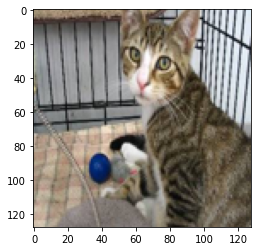

In [15]:
print(input_shape)
plt.imshow(x_train[0])

In [16]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=input_shape))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       7

In [17]:
model.compile(loss='categorical_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test))

Epoch 1/15
235/235 [==============================] - 76s 262ms/step - loss: 0.9246 - accuracy: 0.5941 - val_loss: 0.7479 - val_accuracy: 0.5796
Epoch 2/15
235/235 [==============================] - 55s 233ms/step - loss: 0.6366 - accuracy: 0.6867 - val_loss: 0.5908 - val_accuracy: 0.6904
Epoch 3/15
235/235 [==============================] - 55s 232ms/step - loss: 0.5412 - accuracy: 0.7264 - val_loss: 0.5413 - val_accuracy: 0.7260
Epoch 4/15
235/235 [==============================] - 54s 232ms/step - loss: 0.4714 - accuracy: 0.7720 - val_loss: 0.6100 - val_accuracy: 0.6956
Epoch 5/15
235/235 [==============================] - 54s 232ms/step - loss: 0.4261 - accuracy: 0.8081 - val_loss: 0.4582 - val_accuracy: 0.7904
Epoch 6/15
235/235 [==============================] - 54s 232ms/step - loss: 0.3578 - accuracy: 0.8415 - val_loss: 0.5673 - val_accuracy: 0.7352
Epoch 7/15
235/235 [==============================] - 54s 232ms/step - loss: 0.3149 - accuracy: 0.8603 - val_loss: 0.5649 - val_ac

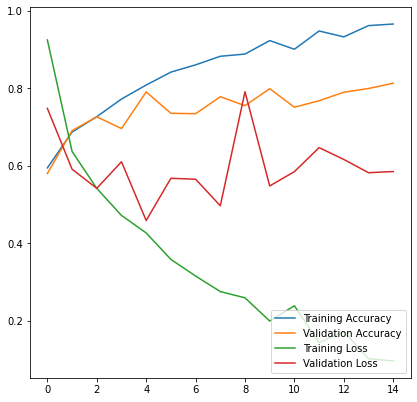

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('')
plt.show()